# Aprendizaje Automático y Big Data
## Práctica 1 : Regresión Lineal

Mario Quiñones Pérez y Guillermo García Patiño Lenza



### PARTE 1

In [1]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

In [2]:
def coste(X, Y, T):
    m = len(X)
    estimacion = T[0] + T[1]*X
    error = estimacion - Y
    i = sum(error**2)
    coste = (1/(2*m))*i
    return coste

In [3]:
def calculoJ(datos, a):
    X = datos[:,0]
    Y = datos[:,-1]
    t0 = 0
    t1 = 0
    m = len(X)
    for i in range(1500):
        s0 = s1 = 0
        for i in range(m):
            s0 = s0 + (t0 + t1*X[i] - Y[i])
            s1 = s1 + (t0 + t1*X[i] - Y[i])*X[i]
        t0 = t0 - s0*a/m
        t1 = t1 - s1*a/m
    return (t0, t1)

In [4]:
def main1():
    datos = carga_csv("ex1data1.csv")
    params = calculoJ(datos, 0.01)
    X = datos[:,0]
    Y = datos[:,-1]
    # dibujar grafica
    plt.plot(X, Y, "x")
    min_x = min(X)
    max_x = max(X)
    min_y = params[0] + params[1] * min_x
    max_y = params[0] + params[1] * max_x
    plt.plot([min_x, max_x], [min_y, max_y])
    plt.savefig("resultado.pdf")

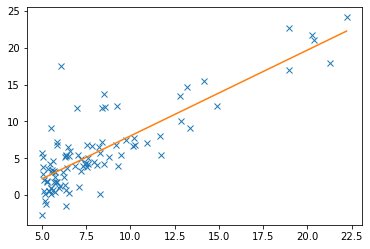

In [5]:
main1()

## Apartado 1.1

In [6]:
def make_data(t0_range, t1_range, X, Y) :        
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    Coste = np.empty_like(Theta0)
    for ix , iy in np.ndindex(Theta0.shape):
        Coste[ix,iy] = coste(X, Y, [Theta0[ix,iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

In [135]:
def draw(r):
    plt.contour(r[0], r[1], r[2], np.logspace(-2, 3, 20))
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(r[0], r[1], r[2], cmap=cm.rainbow, linewidth=0,antialiased=False)
    tmp_planes = ax.zaxis._PLANES 
    ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                         tmp_planes[0], tmp_planes[1], 
                         tmp_planes[4], tmp_planes[5])
    ax.view_init(elev=30, azim=220)
    plt.show()

In [136]:
def main11():
    datos = carga_csv("ex1data1.csv")
    X = datos[:,0]
    Y = datos[:,1]
    r = make_data([-10, 10], [-1, 4], X, Y)
    draw(r)

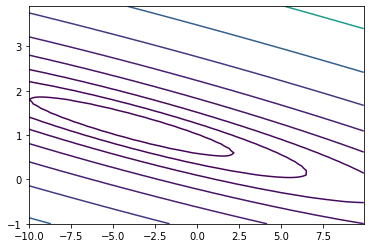

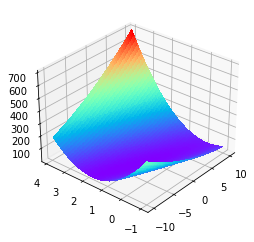

In [137]:
main11()




### PARTE 2

In [10]:
def normaliza(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return(X_norm, mu, sigma)

In [133]:
def coste_2(X, Y, T):
    H = (np.dot(X,T) - Y)**2
    Sum = sum(H)
    m = len(X)
    coste = Sum/2*m
    return coste

In [151]:
def calculoJ(datos, alpha):
    X = datos[:,:-1]
    X_norm, mu, sigma = normaliza(X)
    Y = datos[:,-1]
    m = np.shape(X)[0]
    X_norm = np.hstack([np.ones([m,1]), X_norm])
    Thetas, coste = descenso_gradiente(X_norm, Y, alpha)
    return Thetas
    
    

datos = carga_csv("ex1data2.csv")
calculoJ(datos, 0.01)

array([[  340412.65957446],
       [74563715.11243291],
       [38569720.33788806]])

In [131]:
def descenso_gradiente(X, Y, alpha):
    m = np.shape(X)[1]
    T = np.ones([m,1])
    
    for i in range(1500):
        gradiente(X, Y, T, alpha)
        
    return T , coste_2(X, Y, T)

In [129]:
def gradiente(X, Y, Theta, alpha):
    NuevaTheta = Theta
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    for i in range(n):
        Aux_i = Aux * X[:, i]
        NuevaTheta[i] -= (alpha / m) * Aux_i.sum()
    return NuevaTheta

In [138]:
def make_data_2(t0_range, t1_range, X, Y) :        
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    Coste = np.empty_like(Theta0)
    for ix , iy in np.ndindex(Theta0.shape):
        Coste[ix,iy] = coste_2(X, Y, [1 , Theta0[ix,iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

In [147]:
def draw_2(r):
    plt.
    plt.show()

In [157]:
def fun(x, T):
    T[0] + T[1]*x + T[2]*x**2

ValueError: x, y, and format string must not be None

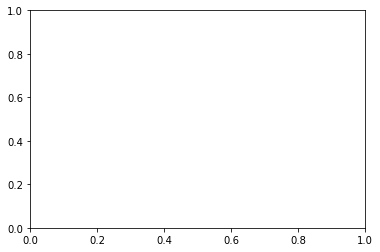

In [159]:
def main21():
    datos = carga_csv("ex1data2.csv")
    T = calculoJ(datos, 0.01)
    puntos = np.linspace(1,20,100)
    plt.plot(puntos, fun(puntos, T), label="function")
    #r = make_data_2([-10, 10], [-1, 4], X_norm, Y)
    
main21()